In [1]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
def plot_eigenvalues(evals, limit=True):
    plt.figure(figsize=(8,6))
    plt.plot(np.arange(1, len(evals) + 1), evals, 'o-k')
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Scree plot')
    if limit:
        plt.xlim([0, 100]) 

In [3]:
def plot_basis_vectors(X, evectors):
    plt.figure(figsize=[8, 6])
    plt.plot(X[:, 0], X[:, 1], '.', color=[.5, .5, .5], label='Data')
    plt.axis('equal')
    plt.xlabel('X_1')
    plt.ylabel('X_2')
    plt.plot([0, evectors[0, 0]], [0, evectors[1, 0]], color='r', linewidth=3,
           label='Basis vector 1')
    plt.plot([0, evectors[0, 1]], [0, evectors[1, 1]], color='b', linewidth=3,
           label='Basis vector 2')
    plt.legend()
    plt.show()

In [4]:
def sort_evals_descending(evals, evectors):
    index = np.flip(np.argsort(evals))
    evals = evals[index]
    evectors = evectors[:, index]
    if evals.shape[0] == 2:
        if np.arccos(np.matmul(evectors[:, 0], 1 / np.sqrt(2) * np.array([1, 1]))) > np.pi / 2:
            evectors[:, 0] = -evectors[:, 0]
        if np.arccos(np.matmul(evectors[:, 1], 1 / np.sqrt(2) * np.array([-1, 1]))) > np.pi / 2:
            evectors[:, 1] = -evectors[:, 1]
    return evals, evectors

In [5]:
# Bring mnist data
mnist = fetch_openml(name='mnist_784')
data  = mnist.data

9.683944778781624 %


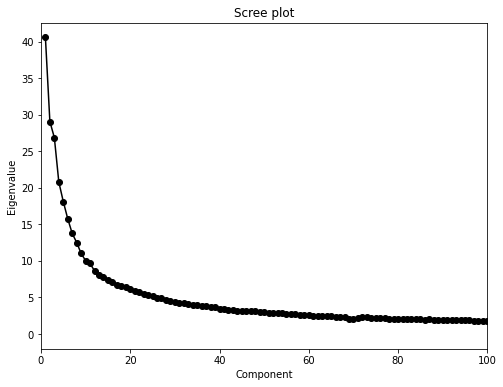

In [6]:
# 1

X_scaled = StandardScaler().fit_transform(data)
X_covariance_matrix = np.cov(X_scaled.T)
eig_vals, eig_vecs  = np.linalg.eig(X_covariance_matrix)

total = sum(eig_vals)
sorted_eig_val = [ (i/total)*100 for i in sorted(eig_vals, reverse=True)]
eig_val_sum = np.cumsum(sorted_eig_val)

# How much variance does each principal component explain?
print(eig_val_sum[1],'%')

# How much variance does each principal component explain?
plot_eigenvalues(eig_vals)

[[-0.00566465 -1.        ]
 [ 0.99998396 -0.        ]]


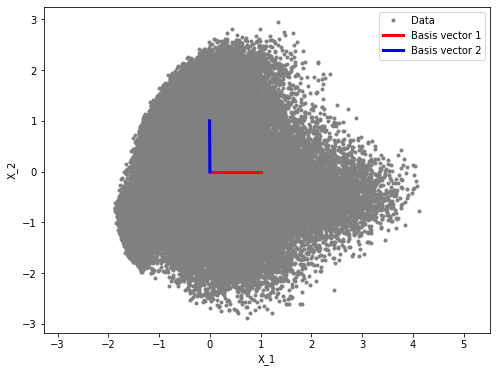

In [7]:
# 2

pca = PCA(n_components=2)
X = pca.fit_transform(data)

X_std = StandardScaler().fit_transform(X)
X_covariance_matrix = np.cov(X_std.T)
eig_vals, eig_vecs  = np.linalg.eig(X_covariance_matrix)

eig_vec_val  = sort_evals_descending(eig_vals, eig_vecs)
new_eig_vecs = eig_vec_val[1]

print(new_eig_vecs)

# plot the two components that explain the most variance 
plot_basis_vectors(X_std, eig_vecs)

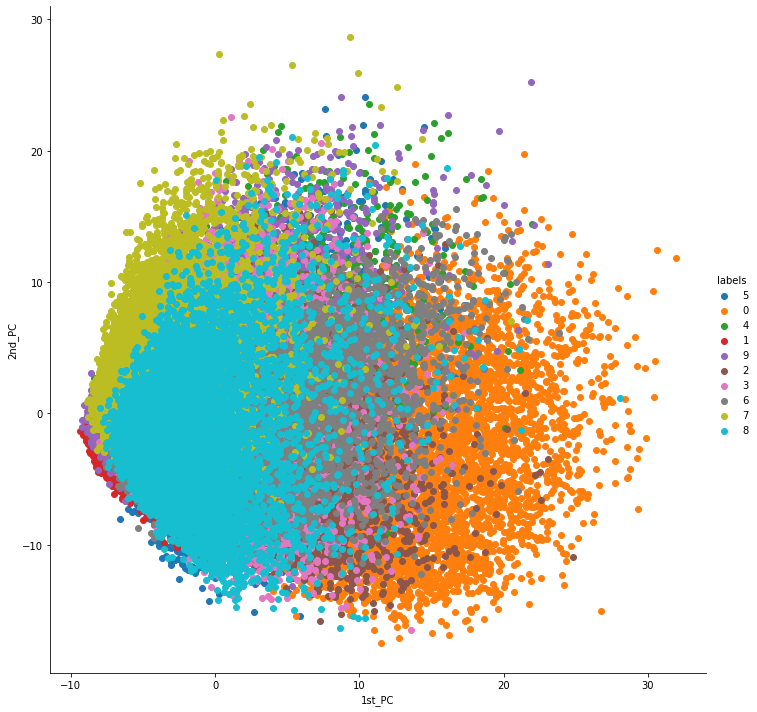

In [8]:
# 3

X_std = StandardScaler().fit_transform(data)

pca = PCA(n_components=2, random_state=0)
X = pca.fit_transform(X_std)

new_data_with_labels = np.vstack((X.T, mnist.target)).T

df = pd.DataFrame(data=new_data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))

# interpret and discuss your results
sns.FacetGrid(df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()